# Linear regression with one and multiple variables

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [2]:
import os
path = os.getcwd() + '/dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

Ex. 1 Use the head and describe function to examine the data and display few columns.

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Ex. 2 Plot and analyze the data, where: x - population, y - profit.

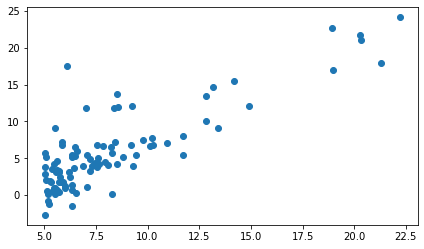

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))

ax.scatter(data['Population'], data['Profit'])

Ex. 3 In order to make this cost function work we need to insert a column of 1s at the beginning of the data frame.

In [6]:
data.insert(0, "Ones", np.ones(data.shape[0], dtype=int), True)
data

,Ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


Ex. 4 We need to separate our data into independent variables X (column 0,1) and our dependent variable y (col. 3). Check with the head function if your implementation is correct:

In [7]:
X = data[['Ones', 'Population']]
Y = data[['Profit']]

In [8]:
X = np.array(X)
Y = np.array(Y).reshape((data.shape[0],))
theta = np.array([0,0])

Ex. 6 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on $X$, $y$ and parameter $\theta$.

In [9]:
def f(x, t):
    return np.matmul(x, t.T)

def cost(x, y, t):
    return (1 / (2 * y.shape[0])) * np.sum(np.square(f(x, t) - y))

def diff(x, y, t):
    return (1 / (2 * y.shape[0])) * np.matmul((f(x, t) - y), x)


Ex. 7 Test the cost function with ($\theta=0$).
Output: 32.07 (may differ…)

In [10]:
cost(X, Y, theta)


32.072733877455676

Ex. 8 Please implement the gradient descent algorithm:
    the function returns optimized values $\theta$
and a vector of the cost function value for each iteration.

In [11]:
def grad(x, y, t, a, it):
    costs = []    
    for i in range(it):
        costs.append(cost(x, y, t))
        t = t - a * 2 * diff(x, y, t)
    return t, costs


In [12]:
theta, c = grad(X, Y, theta, 0.01, 1000)

Ex. 9 Please calculate the optimal parameters for the dataset.  
Ex. 10 Please calculate the cost function for the given θ.

In [13]:
print('Optimal parameters: {} \nCost: {}'.format(theta, c[-1]))

Optimal parameters: [-3.24140214  1.1272942 ] 
Cost: 4.516096429262984


Ex. 11 Plot the regression function and our dataset.

<function matplotlib.pyplot.show>

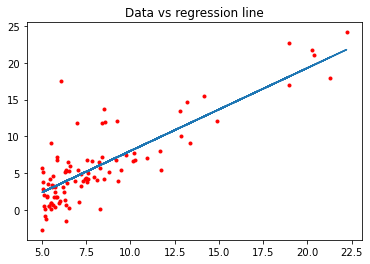

In [14]:
plt.plot(X[:, 1], Y, 'r.')
plt.plot(X[:, 1], np.matmul(X, theta.T))
plt.title('Data vs regression line')
plt.show

Ex. 12 Plot the relationship between the cost function and number of iterations.

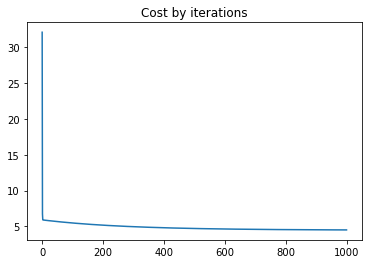

In [15]:
plt.plot(c)
plt.title('Cost by iterations')
plt.show()

# Linear regression with multiple variables

Ex. 1. Notice that the scale of the values for each variable is vastly different. A house will typically have 2-5 bedrooms but may have anywhere from hundreds to thousands of square feet. To fix this, we need to do something called “feature normalization”. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation.  

In [16]:
path = os.getcwd() + '/dane2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])

data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [17]:
data2.describe()

,Size,Bedrooms,Price
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,3.779483e-17,2.746030e-16,-9.684924e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


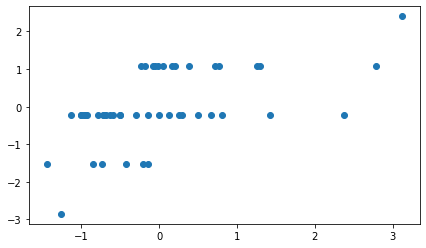

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))

ax.scatter(data2['Size'], data2['Bedrooms'])

In [19]:
data2.insert(0, "Ones", np.ones(data2.shape[0], dtype=int), True)
X2 = data2[['Ones', 'Size', 'Bedrooms']]
Y2 = data2[['Price']]
X2 = np.array(X2)
Y2 = np.array(Y2).reshape((data2.shape[0],))
theta2 = np.array([0, 0, 0])

In [21]:
print(X2.shape)
print(Y2.shape)

(47, 3)
(47,)


Ex.2 Please perform steps 3-11 from the previous task by using the same functions.

In [22]:
theta2, c2 = grad(X2, Y2, theta2, 0.01, 1000)

In [23]:
print('Optimal parameters: {} \nCost: {}'.format(theta2, c2[-1]))

Optimal parameters: [-9.77586806e-17  8.78503652e-01 -4.69166570e-02] 
Cost: 0.13070351602534264


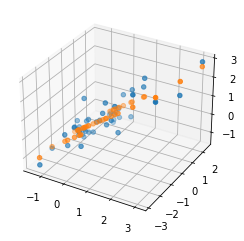

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X2[:, 1], X2[:, 2], Y2)
ax.scatter3D(X2[:, 1], X2[:, 2], f(X2, theta2))
plt.show()

# Exercise - Boston database

In [40]:
boston = datasets.load_boston()
boston_X = boston.data
boston_Y = boston.target

boston_X = (boston_X - boston_X.mean()) / boston_X.std()

xTr, xTs, yTr, yTs = train_test_split(boston_X, boston_Y, test_size=0.3, shuffle=True) 
regression = linear_model.LinearRegression()
regression.fit(xTr, yTr)
yPr = regression.predict(xTs)
print('Coefficients: \n', regr.coef_)

error = np.mean((regr.predict(xTs) - yTs) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [-1.75295970e+01  7.38600033e+00  2.81375615e+00  3.16719092e+02
 -2.76897860e+03  4.82956432e+02  3.10759142e+00 -1.93522815e+02
  4.29049749e+01 -1.83552259e+00 -1.32799323e+02  1.29621153e+00
 -7.50273578e+01]
Residual sum of squares: 30.444592427051965


<function matplotlib.pyplot.show>

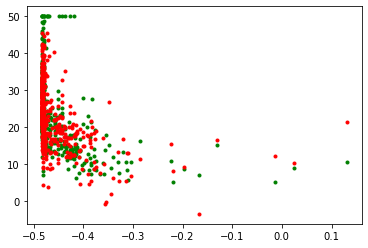

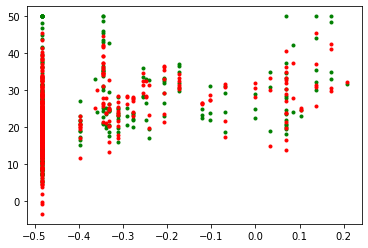

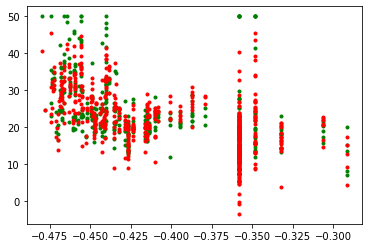

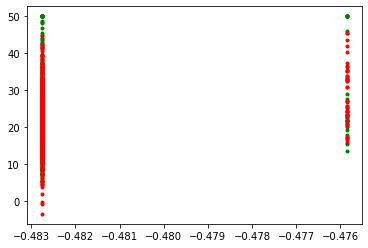

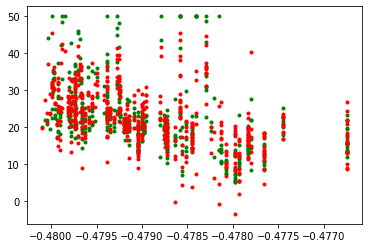

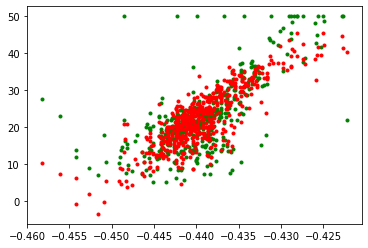

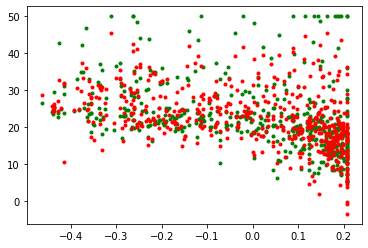

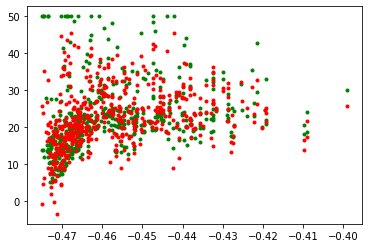

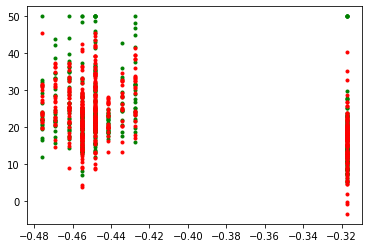

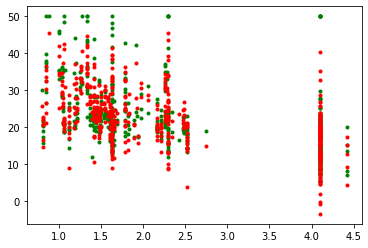

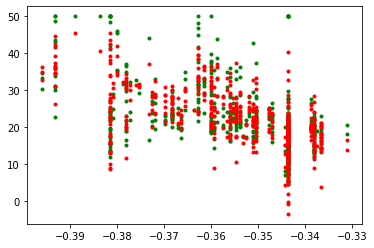

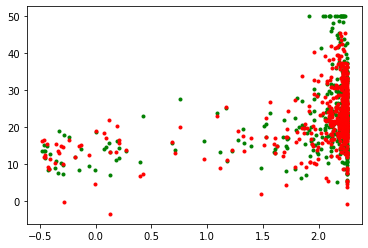

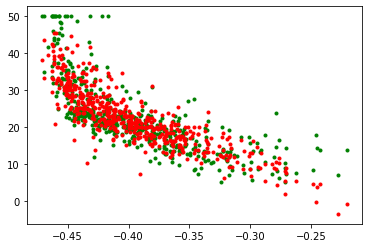

In [44]:
for v in range(boston_X.shape[1]):
    plt.figure()
    plt.plot(boston_X[:, v], boston_Y, 'g.')
    plt.plot(boston_X[:, v], regression.predict(X=boston_X), 'r.')

plt.show